# Practice Task

For your main research task you will be exploring the [World Health Statistics](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete) to answer a research question (determined by you). This notebook walks you through some useful techniques for loading data and preparing it for use in machine learning. You won't have to write any code to run machine learning in the main task (unless you want to!) as we will provide this code for you. You should still look at the machine learning section of this notebook to understand what is happening and what the inputs and outputs are.

Your task is to address the following research questions:

1. How does access to handwashing facilities affect life expectancy?
2. [Extension task] How does the adolescent birth rate in a country affect life expectancy?

By the end of this practice task, you will:

- Have gained insights from the World Health Statistics data
- Know how to clean and join dataframes
- Be aware of how data needs to be prepared for machine learning
- Have experience interpreting a linear regression model
- Have experience using Python and the `pandas` library to manipulate data
- Have experience using Python and the `matplotlib` library to plot data

The solutions to all tasks can be found in [this notebook](https://www.kaggle.com/georginadangerfield/eyf-exercise-answers).

## How does access to handwashing facilities affect life expectancy?

Before we bring the data into the Python notebook, we should read about the dataset. How is the data stored? Is it in tables? What does each table represent? Where did the data come from? How was it measured? 

All of these questions are about the **metadata** of the dataset. Metadata is a dataset about a dataset! And it is important to understand where our data has come from to help us to analyse it.

### TASK 1 - Metadata
Read about the World Health Statistics on the [data page](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete). Answer the following questions. You will need to look at the `Data` tab, the `metadata` tab, and the data explorer, and you might need to Google some of the terms used to answer the questions.

1. How many tables are there?
2. What is the difference between life expectancy and healthy life expectancy?
3. What measures of communicable diseases are there in the dataset?
4. How is access to drinking water measured? i.e. what data is available about access to drinking water?
5. Which organisation created the dataset?
6. What is the earliest available date in the dataset?

*Put your answers here (double click the cell to edit it)*

1. 
2. 
3. 
4. 
5. 
6. 

### Loading the data

In order to answer our first research question,"How does access to handwashing facilities affect life expectancy?", we need to access the data. We will be applying our Python skills to do this. The first thing we should do whenever we are using Python is to load our packages. These are pieces of code that other people have already written, which saves us a lot of time. Run the next cell to load lots of useful packages!

Some packages will not be loaded at this point because we want to show you exactly what they are used for. Just be aware that the best practice is to load them all at the beginning.

Take a look at the comments to see what the packages do.

In [ ]:
import numpy as np # We'll use Numpy for handling missing values later
import pandas as pd # Pandas is used for storing datasets
import os # Stands for "operating system" - used to interact with files among other things

pd.options.mode.chained_assignment = None # This is updating one of the settings for Pandas, not important to the task.

Time to explore our data. To import data we need to know where it is. Run the following cell to see the filenames of the different tables (don't worry if you're not sure what this piece of code does, it's not important for the task).

In [ ]:
# This is a loop - it allows you to perform the same action on lots of different objects
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # This line prints the file name for each table in the dataset
        print(os.path.join(dirname, filename))

That's a lot of files! For our first research question we will only need two - `basicHandWashing.csv` and `lifeExpectancyAtBirth.csv`.

Notice that the first part of every file name is the same - this is the *location* within our Kaggle directory. If you were doing this task on your own machine the file locations would start something like `C:/Users/YourUsername/`.

### TASK 2 - Load the data

Let's load in these tables. We are going to store each file in a *variable* with a sensible name.

Replace `path/to/dataset` with the file name from the list above.

In [ ]:
# Load the handwashing data
hand_washing = pd.read_csv('path/to/dataset') 

# Load the life expectancy data
life_expectancy = pd.read_csv('path/to/dataset')

### Exploring the life expectancy data

Let's start by exploring the life expectancy data.

In [ ]:
# View the first few rows of the dataset

life_expectancy.head()

We have data here from different time periods. We will filter this to include only one year, but before we do that we should see which is the most recent year that is common to both the handwashing and life expectancy datasets.

**NB** *Notice that we didn't need to call `print()` here. In a kernel/notebook, the result of the last line of a code cell is **always** outputted beneath the cell. You only need to use `print()` if you want to see the output of a line that is not at the end of a cell.*

### Boolean values and filtering

In [ ]:
# Find out which dates we have - we can compare to the handwashing dataset to find the most recent date that overlaps both datasets.

life_expectancy['Period'].unique()

The `.unique()` method above searches through all of the values in the selected column and returns the **unique/distinct** values. So we know that only 2019, 2015, 2010, 2000, and 1920 appear in the data.

In [ ]:
# Do the same for the handwashing dataset

hand_washing['Period'].unique()

So the most recent overlapping date is **2015**. We will filter our dataset to include **only** data from 2015.

Filtering a dataset requires *Boolean logic*. We need to create a statement that evaluates to `True` or `False`. 

In Python, Boolean values (`True` and `False`) are a data type, just like integers and strings are datatypes. Boolean datatypes can only be one of these two possible values.

Here is a statement that evaluates to `True` or `False` depending on whether or not the year is 2015:

In [ ]:
year = 2015

year == 2015

This cell uses the `=` symbol in two very different ways!

In the first line, `year = 2015`, the `=` **assigns** the integer value 2015 to the variable `year`.

In the second line, a double equals symbol appears `==`. This is a **comparison** operator. Python will return `True` if the two values either side of `==` are the same, and `False` if they are not.

**Try it yourself** - change the first line to `year = 2021` and see what happens when you run the cell. Now the year variable is **not** equal to 2015, so Python returns `False`.

Let's apply this to our dataset. We want to create a table of **only** values where the `Period` is 2015. 

We can compare an entire column to a number, and Python will return a series of `True`s and `False`s - one for each value in the column:

In [ ]:
life_expectancy['Period']==2015

We can use this statement as a *mask*. We cover the dataset with the mask and only the `True` values can be seen. Then we save this as a new dataset.

In [ ]:
# To filter a dataset we need to use our statement as a mask

mask = life_expectancy['Period']==2015 # remember, this is a series of Trues and Falses

life_expectancy_2015 = life_expectancy[mask]  # Keep only the values that are True

life_expectancy_2015['Period'].unique()  # Now let's look again at the unique dates

There's only *one* unique value in the whole Period column now: 2015. So the whole dataframe `life_expectancy_2015` has only values from 2015. 

### TASK 3 - Exploring the Life Expectancy 2015 data

Let's explore this dataset further. Run the following cells and answer the questions underneath.

In [ ]:
# View the first five rows of the dataframe:

life_expectancy_2015.head()

Note that the "First Tooltip" column holds the values for the measure in the "Indicator" column. As it happens, all of the rows have the same indicator: `Life expectancy at birth (years)`. Run the following cell to fix the column headers so that it's easier to understand what's going on.

In [ ]:
# make a new list of column headers
new_column_headers = ['location', 'period', 'indicator', 'sex', 'life_expectancy_at_birth']

# replace the existing column headers with the new list
life_expectancy_2015.columns = new_column_headers

life_expectancy_2015.head()

In [ ]:
# Get some information about the values in the dataframe:

life_expectancy_2015.info()

The `Dtype` column tells us the datatype of the data in each column. The `period` column contains integers (years) and the `life_expectancy_at_birth` column contains floats (numbers with decimal points in them). All the other columns contain *objects*, in this case strings.

It's good to know that the numeric columns contain numeric values - it means we won't have to worry about converting strings to numbers!

The `Non-Null Count` tells us how many rows do not contain null values. Since this number is the same for every column, there are probably no null values in our dataframe. We can check this explicitly by running the following code:

In [ ]:
# check each row for NA (null value) using isna(). If it is null, isna() returns 1, so we can add all the results together to count the null values.
life_expectancy_2015.isna().sum() 

None of the columns contain null values so we don't have to do anything to fix them.

In [ ]:
# Find out important statistics about the dataframe, like the minimum, mean, and maximum life expectancy. 
life_expectancy_2015.describe()

We can ignore the `period` column here because now that we have filtered the dataset there is only one value (2015).

You might be interested to know *which* locations have the highest and lowest life expectancies. We can find this out using *mask*s to filter the dataframe again.

In [ ]:
# A mask to reveal the country with the highest life expectancy
highest_le_mask = life_expectancy_2015['life_expectancy_at_birth']==86.41

life_expectancy_2015[highest_le_mask]

This tells us that Japan is the country with the highest life expectancy.

Use the cell below to find the country with the lowest life expectancy.

In [ ]:
# your code here


There are more **comparison operators** than the `==` equivalence operator. We can also use a mask to find which countries have a life expectancy *greater than* `>` or *less than* a given value:

In [ ]:
greater_than_70 = life_expectancy_2015['life_expectancy_at_birth'] > 70 # Here we use > to mean "greater than"

life_expectancy_2015[greater_than_70]

In [ ]:
# To find out how many countries have a life expectancy greater than 70, find the length of the filtered dataset:

len(life_expectancy_2015[greater_than_70])

Answer the following questions about the life expectancy data. You might need to use code to get some of the answers!

1. What was the mean life expectancy at birth for the world in 2015?
2. How many values are in the dataset?
3. Which country had the lowest life expectancy?
4. What was the life expectancy at birth for women in Ireland in 2015?
5. How many countries have life expectancies greater than 80? Be careful with this one! Don't forget that there is more than one value for each country.

Your answers:

1. 
2. 
3. 
4. 
5. 

In [ ]:
# Use this cell to write code to find the answers

Before we move on to the handwashing data, let's tidy up the life expectancy dataset a bit.

### Removing unnecessary columns

Since the handwashing data doesn't include information about different sexes, we can filter our dataset to include only the "Both Sexes" rows.

In [ ]:
both_sexes_mask = life_expectancy_2015['sex'] == 'Both sexes'

life_expectancy_2015 = life_expectancy_2015[both_sexes_mask]
life_expectancy_2015.head()

Now that we have filtered for 2015 and "both sexes", the `period` and `sex` columns are redundant (i.e. they don't give us any useful information). Also, the `indicator` column has the same value on every row, so that column isn't useful either. We can *drop* these columns and just keep the columns we need.

In [ ]:
life_expectancy_2015.columns

In [ ]:
# make a list of columns we want to drop
columns_to_drop = ['period', 'indicator', 'sex']

# pass this list to the .drop method
life_expectancy_2015.drop(columns = columns_to_drop, inplace = True)  # we use inplace = True to change the dataframe without having to save it to a new variable.
life_expectancy_2015.head()

### TASK 4 - Processing the Handwashing data

Now we will repeat what we did above on the handwashing dataset.

In [ ]:
hand_washing.head()

In [ ]:
# Start by updating the column names
new_column_headers = ['location', 'indicator', 'period', 'region', 'pop_with_handwashing_facilities']
hand_washing.columns = new_column_headers

In [ ]:
# Add code below to filter the handwashing dataset to include only 2015 data.

period_mask = # your code here

hand_washing_2015 = # your code here

In [ ]:
# Now filter to include only the "Total" region (i.e. urban AND rural)

region_mask = # your code here

hand_washing_2015 = # your code here

In [ ]:
# Take a look at the dataset
hand_washing_2015.head()

In [ ]:
# Finally, drop the unnecessary columns

columns_to_drop = # your code here

hand_washing_2015.drop(columns = columns_to_drop, inplace = True)

Run the following cell and compare the output to this image:

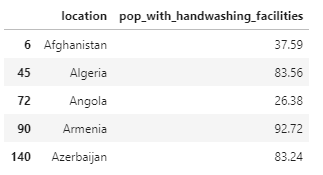

In [ ]:
hand_washing_2015.head()

### TASK 5 - Exploring the handwashing data

Refer to the cells above to get the code you need to answer the following questions about the `hand_washing_2015` dataset.

1. What was the mean population percentage with access to handwashing facilities in 2015?
2. How many values are in the dataset?
3. How many null values are in each column of the dataset?
3. Which country had the lowest percentage of the population with access to handwashing facilities?
4. What percentage of the population of Indonesia has access to handwashing facilities?
5. In how many countries does less than 40% of the population have access to handwashing facilities? 

In [ ]:
# Add your code here



Your answers:

1. 
2. 
3. 
4. 
5. 
6. 

### Merging dataframes

Congratulations! You have tidied and explored two datasets.

Now, onto our first research question. We want to know how the life expectancy varies with access to handwashing facilities. To do that we will need to **merge** our dataframes together to make one big dataframe.

There are lots of different ways we can merge dataframes. The most useful method for our purposes is a **join**.  A join combines two tables by matching up certain values. For example, when we join our dataframes we will want to match up the locations so that for each country we have the data for handwashing and the data for life expectancy in a single row.

There are different ways to join dataframes depending on what data we want to keep from each original dataframe.

Look at the image below, where we have two tables, `tableA` and `tableB`. On the right side of the image are the results of performing different types of join on the two tables. These joins work by matching the values in the left-hand column of each table (the column of capital letters).

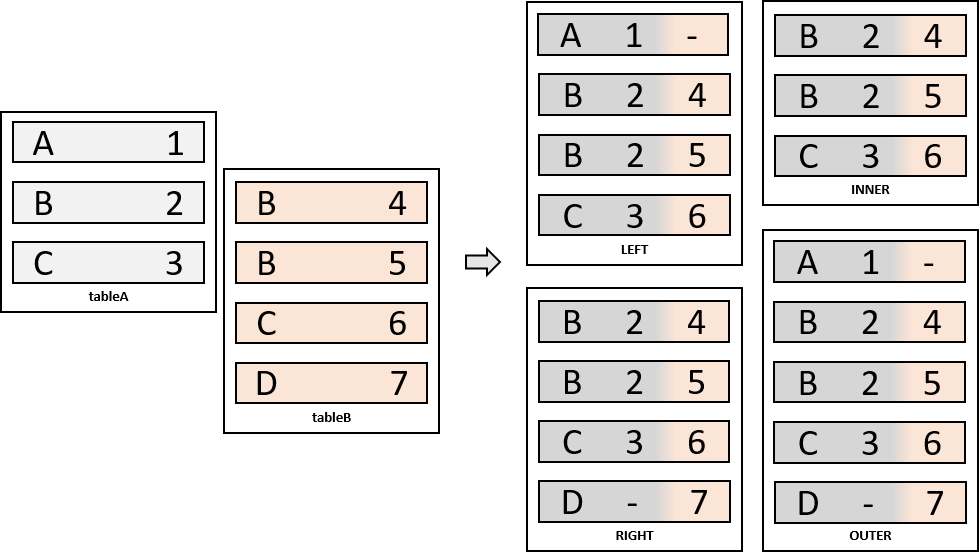

The different types of join available in Pandas are:

* Inner - Only rows with reference values that appear in both dataframes are merged.
* Left - All the data from the 'left' dataframe is retained, and any rows that have matching references are merged from the 'right' dataframe.
* Right - All data from the right and anything that matches from the left. Effectively, the reverse of 'Left'.
* Outer (Full) - all data from the left and right dataframe is retained, matched up where possible.

If we use left, right, or outer joins for our datasets, we will have NULL values (empty cells in the dataframe) because there will be some countries that appear in one dataset but not the other. We just want to have a complete dataset of all locations that appear in both dataframes, so we will be using **inner** joins.

The syntax for joining tables in Python is:

```dataframeA.merge(dataframeB, how = 'inner', on = 'column-to-match')```

The `how` parameter allows you to choose the type of join (inner, left, right, or outer), and the `on` parameter allows you to choose which column(s) to match - either give the name of the column (`on = 'column1'`) or a list of columns (`on = ['column1', 'column2']`) if you want multiple columns to match.

In [ ]:
# Example of a merge

tableA = pd.DataFrame(data = {'column1': ['A', 'B', 'C'], 'column2': [1,2,3]})
tableB = pd.DataFrame(data = {'column1': ['B', 'B', 'C', 'D'], 'column3': [4,5,6,7]})

print(tableA)
print(tableB)

merged_table = tableA.merge(tableB, how = 'inner', on = 'column1')

merged_table

### TASK 6 - Merging your DataFrames

Complete and uncomment the code below to merge your two datasets, `hand_washing_2015` and `life_expectancy_2015`. Compare your result to the image below:

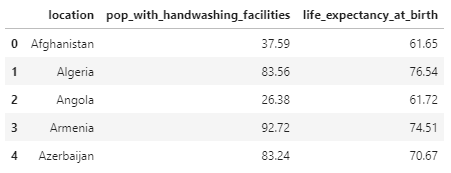

In [ ]:
# merged_df = hand_washing_2015.merge(<your code here>)

merged_df.head()

To check that our data merged correctly, we can find out if there are any *null values* - these are empty cells created when we try to match rows where there is only information in one of the tables (see the left and right joins above). Our previous tables had no null rows so we would expect the merged dataframe to have no null rows.

In [ ]:
# add code here to check how many rows of each column have null values
# hint - look through previous cells in the notebook.


How many matching rows did we find? Enter code below to count the rows in all three datasets, `hand_washing_2015`, `life_expectancy_2015`, and `merged_df`. To display all three values you will need to use `print()` statements.

In [ ]:
# Here's the number of rows for hand_washing_2015
print('Number of rows in hand_washing_2015: ', len(hand_washing_2015))

# add code here


So not all of the rows in the `life_expectancy_2015` dataframe had matches in the `hand_washing_2015` dataframe. If we had used a `right` join we would have had null values:


In [ ]:
hand_washing_2015.merge(life_expectancy_2015, how = 'right', on = 'location').isna().sum()

Notice the 94 null values when we do a right join between `hand_washing_2015` and `life_expectancy_2015`.

### Visualising data

It's difficult to identify any trends or understand our data just by looking at a dataframe. Before we prepare our data for machine learning, we should *visualise* it to get a better idea of how the different factors are related.

We will use the `matplotlib` library to create charts (plots) from our data. `Pyplot` is a module in the matplotlib library that contains all of the functions we will use.

A simple way to see how one variable varies with another one is to plot a **scatter** plot. On this chart, the x axis will represent the proportion of the population for a given country that has access to hand washing facilities, and the y axis will represent the average life expectancy at birth for that country. For each row (country) in the dataframe then, we can place a dot on the chart to show the handwashing access and life expectancy.

We don't have to draw those dots ourselves though! Pyplot does the work for us.

Let's look at how we create a really simple scatter plot below:

In [ ]:
import matplotlib.pyplot as plt # import the pyplot package

# A simple scatter plot

x_data = [1,2,3,4,5,6]

y_data = [1, 4, 9, 16, 25, 36]

plt.scatter(x_data, y_data) # feed the x and y data to pyplot's scatter() function
plt.show() # display the plot

So all we need to create a plot is to decide which values we want on the x-axis and which values we want on the y-axis.

Since we are using handwashing access to predict life expectancy, life expectancy should be on the y-axis.

In [ ]:
x_data = merged_df['pop_with_handwashing_facilities']  # get the column of our dataframe that should be on the x axis (handwashing)
y_data = merged_df['life_expectancy_at_birth']         # get the column of our dataframe that should be on the y axis (life expectancy)


plt.scatter(x_data, y_data)
plt.show()

In [ ]:
# We can also give each axis a label:

plt.scatter(x_data, y_data)
plt.xlabel('Proportion of population with access to hand washing facilities (%)')
plt.ylabel('Life expectancy at birth (years)')
plt.show()

### TASK 7 - Customising your plots

We can also give the plot a title, and even play around with the colour of the markers.

Colours can be given as [hex codes](https://www.w3schools.com/colors/colors_picker.asp) (a six-character code preceded by a `#`), RGB values as a tuple of decimal values between 0 and 1 - e.g. `(0.5, 0.3, 0.1)` - or as a name from a list of [named colours](https://css-tricks.com/snippets/css/named-colors-and-hex-equivalents/). 

1. Try changing the value of `marker_colour` below to see different colours on your plot.
1. Give your plot a title by changing the string assigned to the `title_text` variable.

In [ ]:
marker_colour = 'blue' # Try replacing 'blue' with '#9966ff', (0.9, 0.5, 0.1), and 'seagreen'

title_text = 'Your title here' # Change this to a suitable title for the plot

plt.scatter(x_data, y_data, color = marker_colour)
plt.xlabel('Proportion of population with access to hand washing facilities (%)')
plt.ylabel('Life expectancy at birth (years)')
plt.title(title_text) 
plt.show()

Take a look at the plot you have created. What do you think it tells you about the relationship between the proportion of the population with access to hand washing facilities and the average life expectancy in a country?

Write down your thoughts below:

* 
* 
* 

### Preparing data for machine learning

You may have seen a plot like this one before, in science lessons. You would usually plot your independent variable on the x axis and your dependent variable on the y axis, then you could quantify the **relationship** between them by drawing a line of best fit and finding the gradient of the line.

We can make use of a machine learning algorithm called **linear regression** to draw a line of best fit for us. The algorithm finds the best possible fit by measuring the square of the displacement (distance) between every point and the line, and tweaking the line until this squared displacement is at a minimum. This is called the **method of least squares**.

The displacement has to be squared because sometimes points are above the line of best fit (positive displacement) and sometimes they are below the line of best fit (negative displacement). If we square the displacement then it is always positive so the points above and below the line won't cancel each other out.

Before we can apply linear regression to our dataset, we have some cleaning up to do!

#### Train and test sets

We're going to use our linear regression model to predict the average life expectancy of a country given the proportion of the population that has access to hand-washing facilities. How will we know how accurate our prediction is? In machine learning there is a standard method for testing how good our model is - we reserve a portion of our data (called the **test dataset**) that we don't show to the model until the very end. Usually this is around 20% of our data. The rest of the data is called the **training dataset**. This is used in linear regression to create that line of best fit.

Below we import a **function** that will split your data into training and test datasets. Don't worry about what it's doing exactly for now, just run the cell to save the function so we can use it on our dataset. If you would like to see the function have a look at [this script](https://www.kaggle.com/miachatton/eyf-helpers).

The function returns four datasets:

* X_train - the x-axis data used to **train** the model
* y_train - the y-axis data used to train the model
* X_test - the x-axis data used to **test** the model
* y_test - the y-axis data used to test the model.

In [ ]:
from eyf_helpers import split_dataset

Now that you have stored the function, you can use it by calling `split_dataset()` with the parameters (dataframe, X-columns and y-column).

In [ ]:
# This is where we call the function

# notice how we are assigning values to four variables at once by separating them with commas!
X_train, X_test, y_train, y_test = split_dataset(merged_df, 'pop_with_handwashing_facilities', 'life_expectancy_at_birth')

# Have a look at one of the new datasets
y_test

Now that we have our training and test dataset, we are ready to train our linear regression model.

### Machine Learning

We will be using the Sci-kit learn (`sklearn`) python library to do the machine learning portion of the task. This library has a built-in linear regression *object* that we can train on our training data. Run the cell below to train a model.

In [ ]:
from sklearn.linear_model import LinearRegression # import the LinearRegression object from sklearn

linear_model = LinearRegression() # This gives us a model to train
linear_model.fit(X_train, y_train) # This is the training

That's it! You've trained a machine learning model. Let's see how well it performs on our data and what it can tell us about the relationship between the two variables.

To test our model, we should generate some predictions and see how good they are. It's time to bring in the test dataset. Run the cell below to generate predicted values of life expectancy for the handwashing data in the test dataset.

In [ ]:
predictions = linear_model.predict(X_test)
predictions

In [ ]:
# We can compare the predicted results to the actual results (y_test) on a plot
plt.scatter(X_test, y_test, color = 'green', label = 'Actual values') # we're adding labels so that we can have a legend
plt.scatter(X_test, predictions, color = 'purple', label = 'Predicted values')
plt.xlabel('Proportion of population with access to hand washing facilities (%)')
plt.ylabel('Life expectancy at birth (years)')

plt.legend()   # Here's how we add a legend!
plt.show()

You may notice that all of the predicted values lie on a straight line - that's because a linear regression model is essentially a line of best fit. We can plot it as a straight line instead, using pyplot's `plot()` function instead of `scatter()`.

In [ ]:
plt.scatter(X_test, y_test, color = 'green', label = 'Actual values')
plt.plot(X_test, predictions, color = 'purple', label = 'Predicted values')
plt.xlabel('Proportion of population with access to hand washing facilities (%)')
plt.ylabel('Life expectancy at birth (years)')
plt.legend()   
plt.show()

### TASK 8 - Evaluating your machine learning model

How do *you* think the model is performing? Does it look like the predictions are accurate? Think about how close the real values (green dots) are to the predicted values (purple line).

Write your thoughts here:

* 
* 
* 

We can quantify how well the model is doing by producing some metrics about it. A useful one that we will consider is Mean Absolute Error (MAE). The MAE is calculated by adding up the vertical distances between each green dot and the purple line, then dividing the total by the number of green dots. Thankfully `sklearn` will do this for us.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
mae

This tells us that on average, when our model predicts average life expectancy for a country, it is out by about 3 years.

You might be wondering, what's the value of training this model? Well, you may have noticed that one of the locations in the handwashing dataset (Marshall Islands) did not exist in the life expectancy dataset. We can use our model to *predict* what the life expectancy would be for this country, based on what proportion of the population have access to hand-washing facilities.

In [ ]:
# Marshall Islands appear in the handwashing dataset...
print('Marshall Islands' in hand_washing_2015['location'].unique()) # this is a logical statement using "in"

#... but not in the life expectancy dataset
print('Marshall Islands' in life_expectancy_2015['location'].unique())

### TASK 9 - Predicting an unknown value

Let's use our model to predict life expectancy in the Marshall Islands. All we need to know is what proportion of the population have access to hand-washing facilities. Use the cell below to find this value for the Marshall Islands. You might need to scroll up to remember how to do this!

In [ ]:
# Your code here




Assign the value you calculated above to the hand_washing_prop variable below, and run the cell to predict the average life expectancy.

In [ ]:
hand_washing_prop = # your value here

X_unknown = np.array([hand_washing_prop]).reshape(-1,1) # we have to use the numpy package to get the data in the right format for the model
marshall_islands_prediction = linear_model.predict(X_unknown)[0] # we use the .predict method to apply the model to the data

print("Predicted life expectancy is ", marshall_islands_prediction)

We can also look at the model to find out how it relates to real life.

In [ ]:
linear_model.coef_

The `.coef_` attribute returns the coefficient or **gradient** of the line of best fit.

In [ ]:
linear_model.intercept_

The `.intercept_` attribute shows us where the line crosses the y axis. 

A straight line always follows the formula:

$y = mx + c$

Where m is the gradient (~ 0.18) and c is the intercept (~ 59).  What this tells us is that life expectancy is around 59 in a country where nobody has access to handwashing facilities (where x = 0), and it increases by about .18 years for every percentage of the population that has access to handwashing facilities.

For example, in a country where 50% of the population have access to hand-washing facilities we would expect life expectancy to be: 

$y = 0.18 \times 50 + 59 = 68 years$


In [ ]:
# In this plot we use the coefficient and intercept to construct the line of best fit
# So you can see that all of the predicted values lie on it.

x_values = [0,20,40,60,80,100]
y_values = [0.17733934 * x + 58.532315937318586 for x in x_values] # this is a list comprehension, it's a quick way to apply maths to a list


plt.scatter(X_test, y_test, color = 'green', label = 'Actual values')
plt.scatter(X_test, predictions, color = 'purple', label = 'Predicted values')
plt.plot(x_values, y_values, color = 'blue', label = 'best fit line')
plt.xlabel('Proportion of population with access to hand washing facilities (%)')
plt.ylabel('Life expectancy at birth (years)')
plt.legend()   
plt.show()

## TASK 10 - How does the adolescent birth rate in a country affect life expectancy?

Over to you! Make use of the `life_expectancy_2015` dataset, but this time combine it with the data in the following location:

`/kaggle/input/who-worldhealth-statistics-2020-complete/adolescentBirthRate.csv`

This dataset contains the *Adolescent birth rate (per 1000 women aged 15-19 years)* for each location.

Fill in the code cells to prepare this dataset for machine learning.


In [ ]:
# read in the data

adolescent_brate = # your code here

# take a look
adolescent_brate.head()

In [ ]:
# rename the columns

new_column_names = # your code here

adolescent_brate.columns = new_column_names

In [ ]:
# filter to include only period == 2015

period_mask = # your code here
adolescent_brate_2015 = # your code here

In [ ]:
# drop the unnecessary columns
columns_to_drop = #your code here

# fill in the brackets and uncomment this line
# adolescent_brate_2015.drop(<fill this in>) 

In [ ]:
# Explore the data - look at the mean/median values and find out how many values there are

In [ ]:
# Join the data to the life expectancy dataframe

merged_df = # your code here

In [ ]:
# Plot the data. Try choosing a colour for the markers!

x_data = # your code here
y_data = # your code here

x_label = 'X AXIS LABEL HERE'
y_label = 'Y AXIS LABEL HERE'
title = 'TITLE HERE'


plt.scatter(x_data, y_data)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.show()

In [ ]:
# Split your data into training and testing data

X_train, X_test, y_train, y_test = split_dataset(merged_df, 'adolescent_birth_rate', 'life_expectancy_at_birth')

# Train your machine learning model

linear_model.fit(X_train, y_train)

# Get your predicted values

predictions = # your code here

In [ ]:
# Plot the line of best fit

plt.scatter(X_test, y_test, color = 'green', label = 'Actual values')
plt.plot(X_test, predictions, color = 'purple', label = 'Predicted values')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.legend()   
plt.show()

In [ ]:
# Calculate the mean absolute error (MAE)

mae = # your code here
mae

In [ ]:
# Print the intercept and coefficient. What do these values tell you?


What do you notice that is different about this model compared to the previous one? Look at the plot, the MAE, and the intercept and coefficient.

* 
* 
* 

## Conclusions

What have you learned from the data you explored in this task? What are your insights about global life expectancy?

* 
* 
* 
* 